In [459]:
import numpy as np
import pandas as pd

In [460]:
train_df = pd.read_csv('Train (1).csv')
test_df = pd.read_csv('Test (1).csv')

In [461]:
# Merge both the dataframes
train_df = pd.concat([train_df,test_df])

## Data Preprocessing
#### 1. Handling Null values

In [462]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [463]:
train_df[train_df['Ever_Married'].isnull()].index

Index([  24,  108,  201,  213,  272,  311,  452,  508,  601,  701,
       ...
       2196, 2221, 2249, 2286, 2288, 2289, 2290, 2371, 2436, 2491],
      dtype='int64', length=190)

In [464]:
## Handling Missing values for the columns
# Col: Ever_Married

train_df['Ever_Married'].value_counts()

# Since there are more Yes category in the column, you can fill the null values with 'Yes'

train_df['Ever_Married'].fillna('Yes',inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_30524\2286861032.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Ever_Married'].fillna('Yes',inplace=True)


In [465]:
train_df['Ever_Married'].value_counts()

Ever_Married
Yes    6353
No     4342
Name: count, dtype: int64

In [466]:
# Handling column Graduated

train_df['Graduated'].value_counts()
# More Yes, so fill nan with 'Yes'
train_df['Graduated'].fillna('Yes',inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_30524\860654382.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Graduated'].fillna('Yes',inplace=True)


In [467]:
# Handling column Profession
train_df['Profession'].value_counts()
# M-1 remove the null rows
# M-2 Fill the nan with the highest Profession - 'Artist'
# I am choosing M-2

train_df['Profession'].fillna('Artist',inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_30524\2912885388.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Profession'].fillna('Artist',inplace=True)


In [468]:
train_df['Work_Experience'].value_counts()
# fill the nan with 1.0
train_df['Work_Experience'] = train_df['Work_Experience'].fillna(1.0)

In [469]:
train_df.isna().sum()
# No null values in any column
# Now delete all nan values in the dataset

train_df = train_df.dropna()

In [470]:
train_df.shape

(10158, 11)

#### 2. Remove duplicate data

In [471]:
train_df.duplicated().sum()
# there are no duplicates in the dataset

37

In [472]:
train_df.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


#### 3. EDA and Feature Engineering

In [473]:
# Find Categorical and Numerical cols

cat = []
num = []

for i in train_df.columns:
    if (train_df[i]).dtype=='O':
        cat.append(i)
    else:
        num.append(i)
        
print(cat,num,sep='\n')

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']
['ID', 'Age', 'Work_Experience', 'Family_Size']


In [474]:
# Now the column 'Segmentation' is target column
# Now find the columns with just binary categories

binary_cat = []
for i in cat:
    if len(train_df[i].value_counts())==2:
        binary_cat.append(i)
        
print(binary_cat)        

['Gender', 'Ever_Married', 'Graduated']


In [475]:
train_df.loc[7671,'Gender']

'Male'

#### Univariate and Bivariate analysis


In [476]:
import matplotlib.pyplot as plt

(array([1243., 1832., 1694., 1561., 1425.,  708.,  592.,  503.,  266.,
         334.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

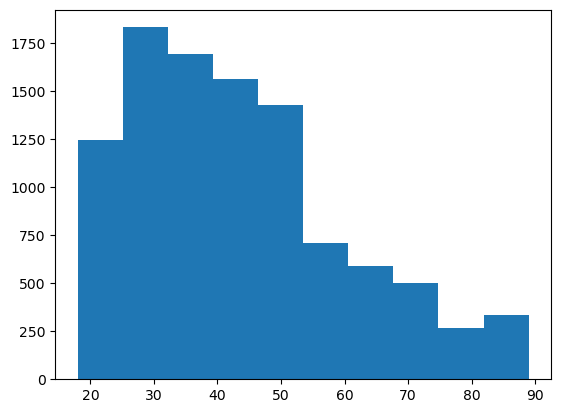

In [477]:
plt.hist(train_df['Age'],bins=10)

In [478]:
for i,j in enumerate(num[1:]):
    print(i,j)

0 Age
1 Work_Experience
2 Family_Size


In [479]:
import seaborn as sns

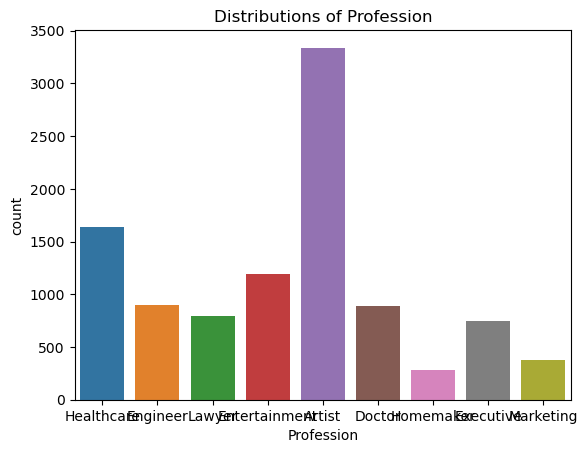

In [480]:
# For each numerical column, having a box plot
sns.countplot(x='Profession',data=train_df)
plt.title("Distributions of Profession")
plt.xticks
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


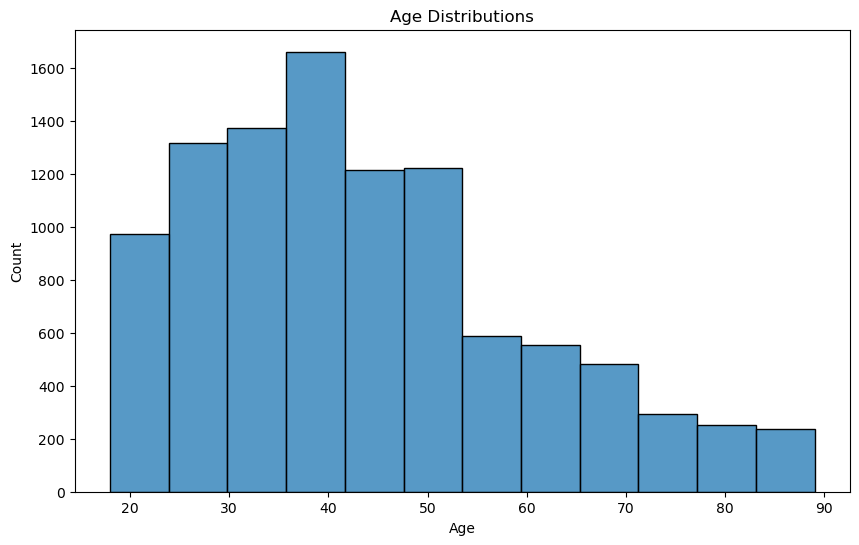

In [481]:
plt.figure(figsize=(10,6))
sns.histplot(x='Age',data=train_df,bins=12)
plt.title("Age Distributions")
plt.show()

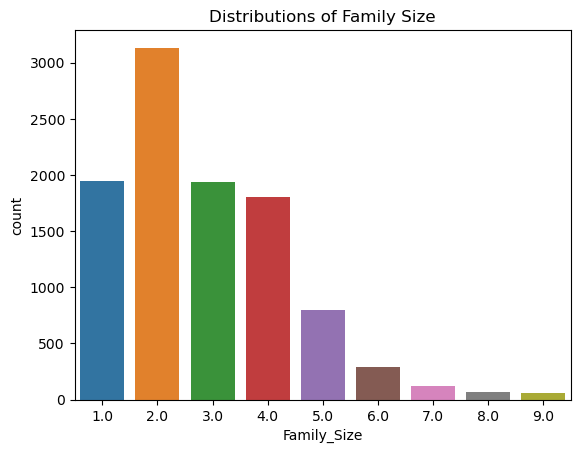

In [482]:
sns.countplot(x='Family_Size',data=train_df)
plt.title("Distributions of Family Size")
plt.xticks
plt.show()

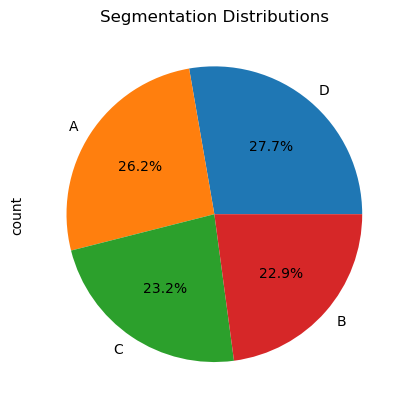

In [483]:
train_df['Segmentation'].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.title("Segmentation Distributions")
plt.show()

In [484]:
# To handle binary categorical columns, we can just use np.where function

train_df['Gender'] = np.where(train_df['Gender']=='Male',1,0)
train_df['Ever_Married'] = np.where(train_df['Ever_Married']=='Yes',1,0)
train_df['Graduated'] = np.where(train_df['Graduated']=='Yes',1,0)

In [485]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10158 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10158 non-null  int64  
 1   Gender           10158 non-null  int32  
 2   Ever_Married     10158 non-null  int32  
 3   Age              10158 non-null  int64  
 4   Graduated        10158 non-null  int32  
 5   Profession       10158 non-null  object 
 6   Work_Experience  10158 non-null  float64
 7   Spending_Score   10158 non-null  object 
 8   Family_Size      10158 non-null  float64
 9   Var_1            10158 non-null  object 
 10  Segmentation     10158 non-null  object 
dtypes: float64(2), int32(3), int64(2), object(4)
memory usage: 1.1+ MB


In [486]:
# Now handle the columns with more than 2 categories
# 'Profession', 'Spending_Score', 'Var_1', 'Segmentation'
# Col 1. Profession

# 'Artist', 'Healthcare', 'Entertainment', 'Engineer', 'Doctor', 'Lawyer',
#     'Executive', 'Marketing', 'Homemaker'

train_df['Profession'].replace(to_replace=['Artist', 'Healthcare', 'Entertainment', 'Engineer', 'Doctor', 'Lawyer',
                                           'Executive', 'Marketing', 'Homemaker'],
                               value=[1,2,3,4,5,6,7,8,9],inplace=True)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_30524\3404001740.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Profession'].replace(to_replace=['Artist', 'Healthcare', 'Entertainment', 'Engineer', 'Doctor', 'Lawyer',
C:\Users\KIIT\AppData\Local\Temp\ipykernel_30524\3404001740.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('

In [487]:
# Col 2. Spending_Score
# ['Low', 'Average', 'High']
train_df['Spending_Score'].replace(to_replace=['Low', 'Average', 'High'],value=[1,2,3],inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_30524\3827815649.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Spending_Score'].replace(to_replace=['Low', 'Average', 'High'],value=[1,2,3],inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_30524\3827815649.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silen

In [492]:
# Col 3. Var_1
# ['Cat_6', 'Cat_4', 'Cat_3', 'Cat_2', 'Cat_7', 'Cat_1', 'Cat_5'
train_df['Var_1'].replace(to_replace=['Cat_6', 'Cat_4', 'Cat_3', 'Cat_2', 'Cat_7', 'Cat_1', 'Cat_5'],
                         value = [6,4,3,2,7,1,5],
                         inplace=True)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_30524\1816468711.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Var_1'].replace(to_replace=['Cat_6', 'Cat_4', 'Cat_3', 'Cat_2', 'Cat_7', 'Cat_1', 'Cat_5'],
C:\Users\KIIT\AppData\Local\Temp\ipykernel_30524\1816468711.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sile

In [488]:
# Col 4. Segmentation
# ['D', 'A', 'B', 'C']
train_df['Segmentation'].replace(to_replace=['D', 'A', 'B', 'C'],
                                value=[4,1,2,3],
                                inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_30524\2548598953.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Segmentation'].replace(to_replace=['D', 'A', 'B', 'C'],
C:\Users\KIIT\AppData\Local\Temp\ipykernel_30524\2548598953.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['

In [493]:
train_df.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,2,1.0,1,4.0,4,4
1,0,1,38,1,4,1.0,2,3.0,4,1
2,0,1,67,1,4,1.0,1,1.0,6,2
3,1,1,67,1,6,0.0,3,2.0,6,2
4,0,1,40,1,3,1.0,3,6.0,6,1


In [496]:
#you don't need the id column as well

In [497]:
train_df.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,2,1.0,1,4.0,4,4
1,0,1,38,1,4,1.0,2,3.0,4,1
2,0,1,67,1,4,1.0,1,1.0,6,2
3,1,1,67,1,6,0.0,3,2.0,6,2
4,0,1,40,1,3,1.0,3,6.0,6,1


In [498]:
train_df.shape

(10158, 10)

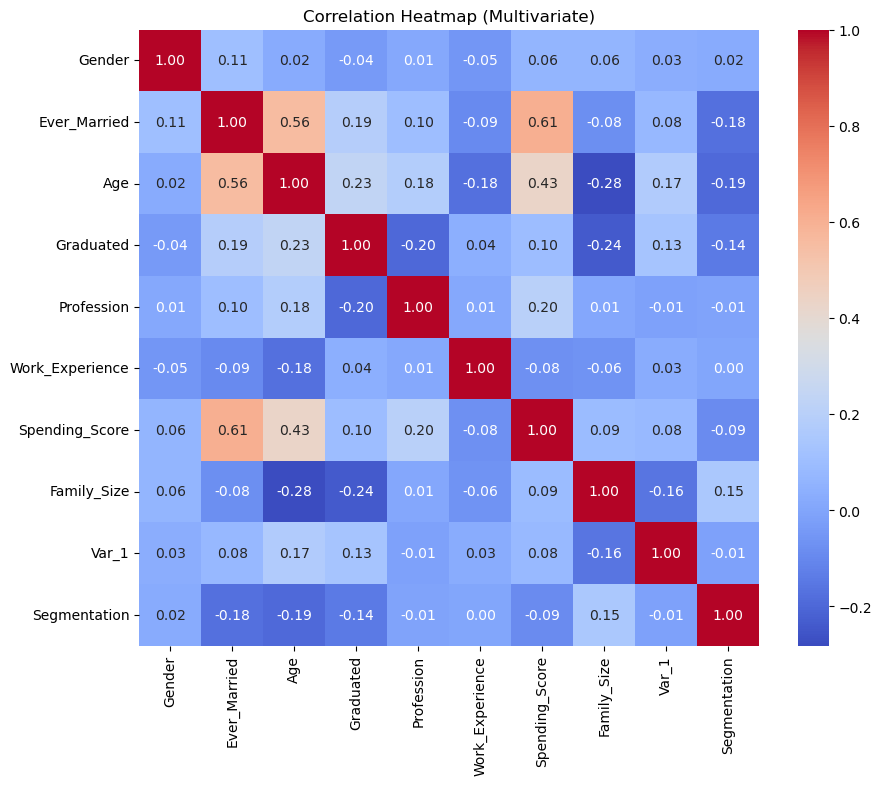

In [499]:
# Correlation Heatmap visualization code
correlation_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Multivariate)')
plt.show()

# The heatmap provides insights into strength and direction of relationships between nnumerical
# variables

#### 4. Visualizations and Handling Outliers

In [500]:
import seaborn as sns

<Axes: xlabel='Age'>

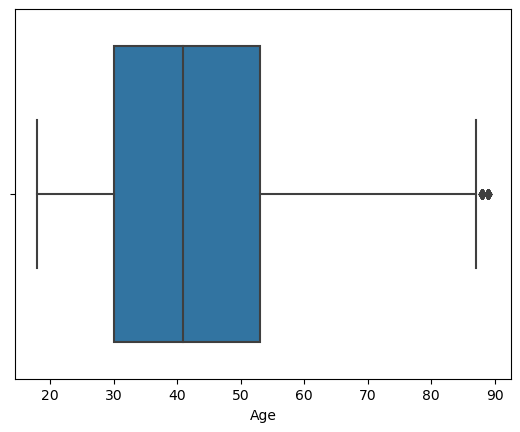

In [501]:
# handling outliers
# check in continuous numerical data
# check for columns age and work_experience
#sns.axes_style()
#sns.boxplot(data=train_df['Age'])
sns.boxplot(x=train_df["Age"])
# in general can say that there is no outliers

In [502]:
# Handling outliers
# calculating Q1
q1=train_df["Age"].quantile(0.25)
print("q1:",q1)
# calculating q3
q3=train_df["Age"].quantile(0.75)
print("q3:",q3)
# calculating IQR
IQR=q3-q1
print("IQR:",IQR)
#calculating lowerlimit
ll=q1-(IQR*1.5)
print("ll:",ll)
# calculating upper limit
ul=q3+(IQR*1.5)
print("ul:",ul)

q1: 30.0
q3: 53.0
IQR: 23.0
ll: -4.5
ul: 87.5


In [503]:
train_df = train_df[(train_df['Age']<ul)&(train_df['Age']>ll)]

In [504]:
numerical_columns = train_df.select_dtypes(include=['int','float'])

### Model Building

In [505]:
train_df['Var_1'].value_counts()

Var_1
6    6611
4    1401
3    1006
2     545
7     257
1     155
5     103
Name: count, dtype: int64

In [506]:
X = train_df.drop(columns=['Segmentation'])
y = train_df['Segmentation']

In [507]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.15,shuffle=True)

In [508]:
# Since the goal is to classify, we shall be using mostly classification algorithms
x_train.shape, y_train.shape, x_test.shape , y_test.shape

((8566, 9), (8566,), (1512, 9), (1512,))

In [509]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [510]:
# Models for classification and also do hyperparameter tuning
# Model 1. KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
y_hat = knn.predict(x_test)

In [511]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_hat,y_test))

0.3921957671957672


In [512]:
# Hyperparameter tuning
from sklearn.model_selection import KFold,cross_val_score

kfold = KFold(n_splits=10,shuffle=True)
cross_val_score(knn,x_train,y_train,cv=kfold,scoring='accuracy')

array([0.43640607, 0.37106184, 0.41073512, 0.39206534, 0.37806301,
       0.39439907, 0.44042056, 0.40303738, 0.39836449, 0.39485981])

In [513]:
data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
kfold = KFold(n_splits = 6, shuffle = True)

# enumerate splits
for i,j in kfold.split(data):
    print('train: ',data[i],'test: ',data[j])

train:  [0.1 0.2 0.3 0.4 0.5] test:  [0.6]
train:  [0.1 0.3 0.4 0.5 0.6] test:  [0.2]
train:  [0.1 0.2 0.4 0.5 0.6] test:  [0.3]
train:  [0.2 0.3 0.4 0.5 0.6] test:  [0.1]
train:  [0.1 0.2 0.3 0.5 0.6] test:  [0.4]
train:  [0.1 0.2 0.3 0.4 0.6] test:  [0.5]


In [514]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors':[1,3,5,7,10],
    'weights':['uniform','distance'],
    'p':[1,2],
    'algorithm':['ball_tree','kd_tree']
}

knn=KNeighborsClassifier()
kfold = KFold(n_splits = 5, shuffle = True)
gcv = GridSearchCV(knn,param_grid,scoring='accuracy',refit=True,cv=kfold,verbose=2)
#refit=True it will trainone last time with the best parameter,and you can predict it with the last one

In [515]:
gcv.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=1, p=2, weights=uniform; total 

[CV] END algorithm=ball_tree, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, n_neighbors=10, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, n_neighbors=10, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, n_neighbors=10, p=2, weights=distance; total time=   0.3s
[CV] END algorithm=ball_tree, n_neighbors=10, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, n_neighbors=10, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=kd_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=kd_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=kd_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=kd_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=kd_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=kd_tree, n_neighbors=1, p=1, weigh

[CV] END algorithm=kd_tree, n_neighbors=10, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=kd_tree, n_neighbors=10, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=kd_tree, n_neighbors=10, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=kd_tree, n_neighbors=10, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=kd_tree, n_neighbors=10, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=kd_tree, n_neighbors=10, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=kd_tree, n_neighbors=10, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=kd_tree, n_neighbors=10, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=kd_tree, n_neighbors=10, p=2, weights=distance; total time=   0.0s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': [1, 3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [516]:
gcv.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}

In [517]:
gcv.best_score_

0.4324067924533443

In [518]:
model = {}
model['KNN']=gcv.best_score_
model

{'KNN': 0.4324067924533443}

In [519]:
pd.DataFrame(gcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020828,0.006415,0.305170,0.010973,ball_tree,1,1,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.377480,0.394629,0.365441,0.365441,0.383538,0.377306,0.011140,37
1,0.020248,0.003601,0.205377,0.010839,ball_tree,1,1,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.377480,0.394629,0.365441,0.365441,0.383538,0.377306,0.011140,37
2,0.015954,0.000123,0.332891,0.016554,ball_tree,1,2,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.382147,0.394046,0.363689,0.366025,0.380619,0.377305,0.011201,39
3,0.016513,0.001006,0.236529,0.007478,ball_tree,1,2,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.382147,0.394046,0.363689,0.366025,0.380619,0.377305,0.011201,39
4,0.014966,0.005392,0.333070,0.017517,ball_tree,3,1,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 3, '...",0.412485,0.413894,0.397548,0.385873,0.395213,0.401003,0.010700,17
5,0.019921,0.003591,0.228262,0.006651,ball_tree,3,1,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 3, '...",0.383314,0.401051,0.374197,0.376532,0.390543,0.385127,0.009793,29
6,0.016897,0.001014,0.371276,0.020479,ball_tree,3,2,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 3, '...",0.405484,0.411559,0.388208,0.381786,0.386457,0.394699,0.011639,24
7,0.017598,0.003201,0.288658,0.009666,ball_tree,3,2,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 3, '...",0.384481,0.393462,0.374781,0.371278,0.389959,0.382792,0.008542,31
8,0.019274,0.003975,0.339643,0.018649,ball_tree,5,1,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",0.419487,0.420315,0.415061,0.400467,0.398132,0.410692,0.009501,9
9,0.018526,0.003120,0.245894,0.003003,ball_tree,5,1,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",0.394399,0.413310,0.389959,0.385289,0.389959,0.394583,0.009797,25


In [520]:
from sklearn.metrics import confusion_matrix

y_hat=gcv.predict(x_test)
confusion_matrix(y_test,y_hat)

array([[174,  85,  64, 101],
       [107, 101,  89,  41],
       [ 63,  84, 138,  40],
       [120,  56,  24, 225]], dtype=int64)

In [521]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.38      0.41      0.39       424
           2       0.31      0.30      0.30       338
           3       0.44      0.42      0.43       325
           4       0.55      0.53      0.54       425

    accuracy                           0.42      1512
   macro avg       0.42      0.42      0.42      1512
weighted avg       0.42      0.42      0.42      1512



In [522]:
#2. DecisionTree
from  sklearn.tree import DecisionTreeClassifier
est = DecisionTreeClassifier()

param_grid={
    'criterion':['gini','entropy']
}
gcv2=GridSearchCV(est,param_grid,scoring='accuracy',refit=True,cv=kfold,verbose=2)
gcv2.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .....................................criterion=gini; total time=   0.0s
[CV] END .....................................criterion=gini; total time=   0.0s
[CV] END .....................................criterion=gini; total time=   0.0s
[CV] END .....................................criterion=gini; total time=   0.0s
[CV] END .....................................criterion=gini; total time=   0.0s
[CV] END ..................................criterion=entropy; total time=   0.0s
[CV] END ..................................criterion=entropy; total time=   0.0s
[CV] END ..................................criterion=entropy; total time=   0.0s
[CV] END ..................................criterion=entropy; total time=   0.0s
[CV] END ..................................criterion=entropy; total time=   0.0s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy',
             verbose=2)

In [523]:
model['DT']=gcv2.best_score_

In [524]:
y_hat2 = gcv.predict(x_test)

confusion_matrix(y_test,y_hat2)

array([[174,  85,  64, 101],
       [107, 101,  89,  41],
       [ 63,  84, 138,  40],
       [120,  56,  24, 225]], dtype=int64)

In [525]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat2))

              precision    recall  f1-score   support

           1       0.38      0.41      0.39       424
           2       0.31      0.30      0.30       338
           3       0.44      0.42      0.43       325
           4       0.55      0.53      0.54       425

    accuracy                           0.42      1512
   macro avg       0.42      0.42      0.42      1512
weighted avg       0.42      0.42      0.42      1512



In [526]:
## Model3. LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_hat3 = lr.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_hat3))
#after kfold cross validation
xt = cross_val_score(lr,x_train,y_train,cv=kfold,scoring='accuracy')
print('Accuracy after cross validation',max(xt))

Accuracy 0.43386243386243384
Accuracy after cross validation 0.45300642148277875


In [527]:
confusion_matrix(y_hat3,y_test)

array([[155, 119,  56,  77],
       [ 41,  44,  36,  28],
       [ 81, 109, 179,  42],
       [147,  66,  54, 278]], dtype=int64)

In [528]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat3))

              precision    recall  f1-score   support

           1       0.38      0.37      0.37       424
           2       0.30      0.13      0.18       338
           3       0.44      0.55      0.49       325
           4       0.51      0.65      0.57       425

    accuracy                           0.43      1512
   macro avg       0.41      0.43      0.40      1512
weighted avg       0.41      0.43      0.41      1512



In [529]:
#Model4.SVM
# use GridSearchCV to obtain best parameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': [1, 10, 100], 
   'gamma': [0.001, 0.0001], 
   'kernel': ['rbf']},
 ]
svm = SVC()
gcv3 = GridSearchCV(svm,param_grid,scoring='accuracy',cv=kfold,verbose=2,refit=True)
gcv3.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   9.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   9.3s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   9.4s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   9.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   9.3s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   9.9s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   9.9s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=  10.2s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=  10.5s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=  10.2s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   9.7s
[CV] END ......................C=10, gamma=0.001,

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [530]:
gcv3.best_score_

0.4410459244666872

In [531]:
model['SVM']=gcv3.best_score_

In [532]:
model['LR']=max(xt)


In [533]:
model

{'KNN': 0.4324067924533443,
 'DT': 0.37438463912111447,
 'SVM': 0.4410459244666872,
 'LR': 0.45300642148277875}

### NeuralNetwork Model

In [534]:
#use unsupervised learning to handle the problem


In [535]:
x=np.array([200.0,17.0])

In [536]:
!pip install tensorflow

In [537]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [538]:

# Load the dataset
train_df = pd.read_csv('Train (1).csv')
test_df = pd.read_csv('Test (1).csv')
# Merge both the dataframes
train_df = pd.concat([train_df,test_df])
train_df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [539]:
# Preprocessing
# Handling missing values
train_df['Work_Experience'].fillna(train_df['Work_Experience'].mean(), inplace=True)
train_df['Family_Size'].fillna(train_df['Family_Size'].mean(), inplace=True)
train_df['Var_1'].fillna(train_df['Var_1'].mode()[0], inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_30524\126901381.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Work_Experience'].fillna(train_df['Work_Experience'].mean(), inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_30524\126901381.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [540]:
# Encoding categorical variables
le = LabelEncoder()
train_df['Gender'] = le.fit_transform(train_df['Gender'])
train_df['Ever_Married'] = le.fit_transform(train_df['Ever_Married'])
train_df['Graduated'] = le.fit_transform(train_df['Graduated'])
train_df['Profession'] = le.fit_transform(train_df['Profession'])
train_df['Var_1'] = le.fit_transform(train_df['Var_1'])
train_df['Spending_Score'] = le.fit_transform(train_df['Spending_Score'])

In [541]:
# Define feature set and target variable
x = train_df.drop(['ID', 'Segmentation'], axis=1)
y = train_df['Segmentation']

# Encoding the target variable
y = le.fit_transform(y)
y = to_categorical(y)  # Convert to one-hot encoding

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalizing the feature set
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [542]:
y

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [543]:
x_train.shape[0]/100

85.56

In [544]:
#Build the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
          
# Output layer
model.add(Dense(4, activation='softmax'))  # 4 output classes (A, B, C, D)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=150, batch_size=100, validation_split=0.2, verbose=1)

C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3112 - loss: 1.3922 - val_accuracy: 0.4346 - val_loss: 1.2495
Epoch 2/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4051 - loss: 1.2780 - val_accuracy: 0.4474 - val_loss: 1.2305
Epoch 3/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4346 - loss: 1.2507 - val_accuracy: 0.4539 - val_loss: 1.2215
Epoch 4/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4297 - loss: 1.2560 - val_accuracy: 0.4568 - val_loss: 1.2160
Epoch 5/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4418 - loss: 1.2337 - val_accuracy: 0.4544 - val_loss: 1.2119
Epoch 6/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4494 - loss: 1.2310 - val_accuracy: 0.4550 - val_loss: 1.2081
Epoch 7/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4487 - loss: 1.2353 - val_accuracy: 0.4544 - val_loss: 1.2067
Epoch 8/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4610 - loss: 1.2146 - val_accuracy: 0.4562 - 

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4890 - loss: 1.1680 - val_accuracy: 0.4696 - val_loss: 1.1925
Epoch 52/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4774 - loss: 1.1885 - val_accuracy: 0.4690 - val_loss: 1.1940
Epoch 53/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4781 - loss: 1.1971 - val_accuracy: 0.4708 - val_loss: 1.1915
Epoch 54/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4863 - loss: 1.1684 - val_accuracy: 0.4702 - val_loss: 1.1952
Epoch 55/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4756 - loss: 1.1936 - val_accuracy: 0.4761 - val_loss: 1.1960
Epoch 56/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4777 - loss: 1.1842 - val_accuracy: 0.4731 - val_loss: 1.1909
Epoch 57/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4841 - loss: 1.1810 - val_accuracy: 0.4749 - val_loss: 1.1941
Epoch 58/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4738 - loss: 1.1835 - val_accuracy: 0.4755 - val_lo

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4761 - loss: 1.1841 - val_accuracy: 0.4796 - val_loss: 1.1926
Epoch 102/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4794 - loss: 1.1760 - val_accuracy: 0.4796 - val_loss: 1.1951
Epoch 103/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5077 - loss: 1.1563 - val_accuracy: 0.4737 - val_loss: 1.1940
Epoch 104/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4787 - loss: 1.1630 - val_accuracy: 0.4761 - val_loss: 1.1938
Epoch 105/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4806 - loss: 1.1669 - val_accuracy: 0.4731 - val_loss: 1.1944
Epoch 106/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4907 - loss: 1.1586 - val_accuracy: 0.4784 - val_loss: 1.1974
Epoch 107/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4903 - loss: 1.1628 - val_accuracy: 0.4761 - val_loss: 1.1966
Epoch 108/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4953 - loss: 1.1676 - val_accuracy: 0.4772 -

In [545]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4631 - loss: 1.1742
Test Accuracy: 48.25%


### Unsupervised Learning method

In [546]:
# usign k-means clustering method
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(x_train)

KMeans(n_clusters=4)

In [549]:
model.predict(x_test).shape

(2139,)

(2139, 4)